In [3]:
import numpy as np
import pandas
import scanpy
import scanpy as sc
import anndata
import os
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import scanpy as sc
import scvelo as scv

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()

BATCH_LABELS = ("S1", "S2")

scanpy==1.4 anndata==0.6.19 numpy==1.16.2 scipy==1.2.1 pandas==0.24.2 scikit-learn==0.20.3 statsmodels==0.9.0 python-igraph==0.7.1 louvain==0.6.1 


In [4]:
batches = {}

for batch in BATCH_LABELS:
    filename = "tgfb1-4-" + batch + ".h5ad"
    filename = os.path.join("write", filename)
    batches[batch] = anndata.read(filename)

batches

{'S1': AnnData object with n_obs × n_vars = 5024 × 2466 
     obs: 'batch', 'cellular_barcode', 'n_counts', 'n_genes', 'percent_mito', 'S_score', 'G2M_score', 'phase', 'louvain', 'cVSMC', 'cVSMC signature'
     var: 'gene_names', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
     uns: 'batch_colors', 'genes_before_highly_variable', 'genes_original', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'phase_colors'
     obsm: 'X_pca', 'X_umap'
     varm: 'PCs'
     layers: 'ambiguous', 'spliced', 'unspliced',
 'S2': AnnData object with n_obs × n_vars = 7048 × 2027 
     obs: 'batch', 'cellular_barcode', 'n_counts', 'n_genes', 'percent_mito', 'S_score', 'G2M_score', 'phase', 'louvain', 'cVSMC', 'cVSMC signature'
     var: 'gene_names', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
     uns: 'batch_colors', 'genes_before_highly_variable', 'genes_original', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'phase_colors'
     obsm: 'X_pca'

In [6]:
for matrix in batches.values():
    scv.tl.velocity(matrix, mode='stochastic')
    scv.tl.velocity_graph(matrix)

Normalized count data: spliced, unspliced.
computing neighbors
    finished (0:00:05.83) --> added to `.uns['neighbors']`
    'distances', weighted adjacency matrix
    'connectivities', weighted adjacency matrix
computing moments based on connectivities
    finished (0:00:01.80) --> added 
    'Ms' and 'Mu', moments of spliced/unspliced abundances (adata.layers)
computing velocities
    finished (0:00:01.21) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:02.76) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
Normalized count data: spliced, unspliced.
computing neighbors
    finished (0:00:03.33) --> added to `.uns['neighbors']`
    'distances', weighted adjacency matrix
    'connectivities', weighted adjacency matrix
computing moments based on connectivities
    finished (0:00:02.15) --> added 
    'Ms' and 'Mu', moments of spliced/unspliced abundances (adata.layers)
co

In [7]:
for matrix in batches.values():
    scv.tl.velocity_embedding(matrix, basis='umap')

computing velocity embedding
    finished (0:00:01.34) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:01.91) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


<Figure size 432x288 with 0 Axes>

In [8]:
help(scv.tl.velocity)

Help on function velocity in module scvelo.tools.velocity:

velocity(data, vkey='velocity', mode=None, fit_offset=False, fit_offset2=False, filter_genes=False, groups=None, groupby=None, groups_for_fit=None, use_raw=False, perc=[5, 95], copy=False)
    Estimates velocities in a gene-specific manner
    
    Arguments
    ---------
    data: :class:`~anndata.AnnData`
        Annotated data matrix.
    vkey: `str` (default: `'velocity'`)
        Name under which to refer to the computed velocities for `velocity_graph` and `velocity_embedding`.
    mode: `'deterministic'`, `'stochastic'` or `'bayes'` (default: `'stochastic'`)
        Whether to run the estimation using the deterministic or stochastic model of transcriptional dynamics.
        `'bayes'` solves the stochastic model and accounts for heteroscedasticity, but is slower than `'stochastic'`.
    fit_offset: `bool` (default: `False`)
        Whether to fit with offset for first order moment dynamics.
    fit_offset2: `bool`, (defa

In [9]:
help(scv.pl.velocity_embedding_grid)

Help on function velocity_embedding_grid in module scvelo.plotting.velocity_embedding_grid:

velocity_embedding_grid(adata, basis=None, vkey='velocity', density=None, smooth=None, min_mass=None, arrow_size=None, arrow_length=None, arrow_color=None, scale=None, autoscale=True, n_neighbors=None, X=None, V=None, X_grid=None, V_grid=None, principal_curve=False, color=None, use_raw=None, layer=None, color_map=None, colorbar=True, palette=None, size=None, alpha=0.2, perc=None, sort_order=True, groups=None, components=None, projection='2d', legend_loc='none', legend_fontsize=None, legend_fontweight=None, right_margin=None, left_margin=None, xlabel=None, ylabel=None, title=None, fontsize=None, figsize=None, dpi=None, frameon=None, show=True, save=None, ax=None, ncols=None, **kwargs)
    Scatter plot of velocities on a grid.
    
    Arguments
    ---------
    adata: :class:`~anndata.AnnData`
        Annotated data matrix.
    x: `str`, `np.ndarray` or `None` (default: `None`)
        x coordi

now plotting for batch S1


<Figure size 432x288 with 0 Axes>

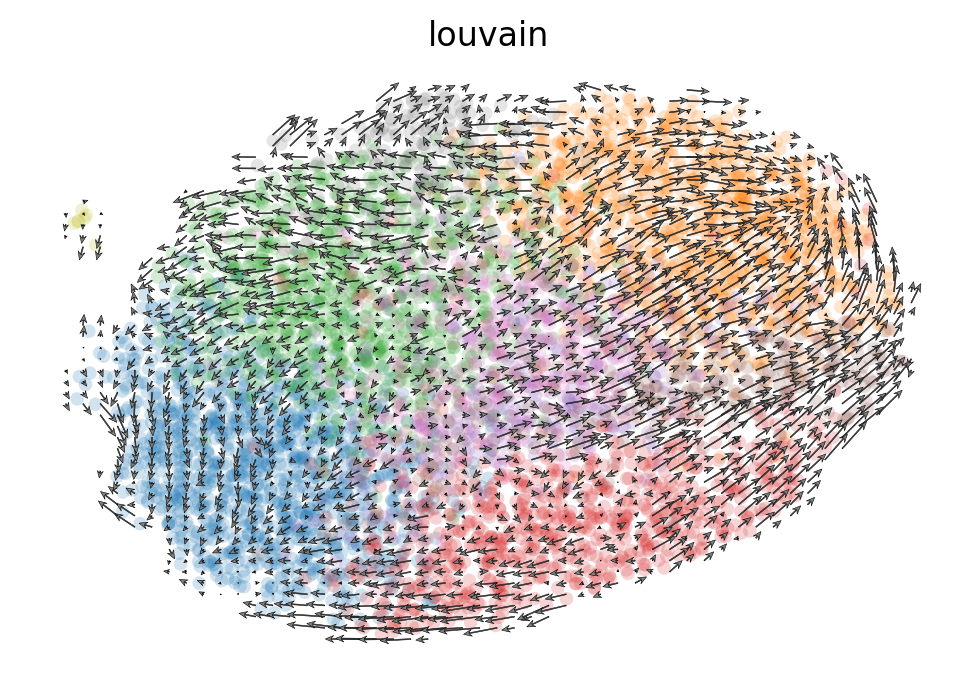

now plotting for batch S2


<Figure size 432x288 with 0 Axes>

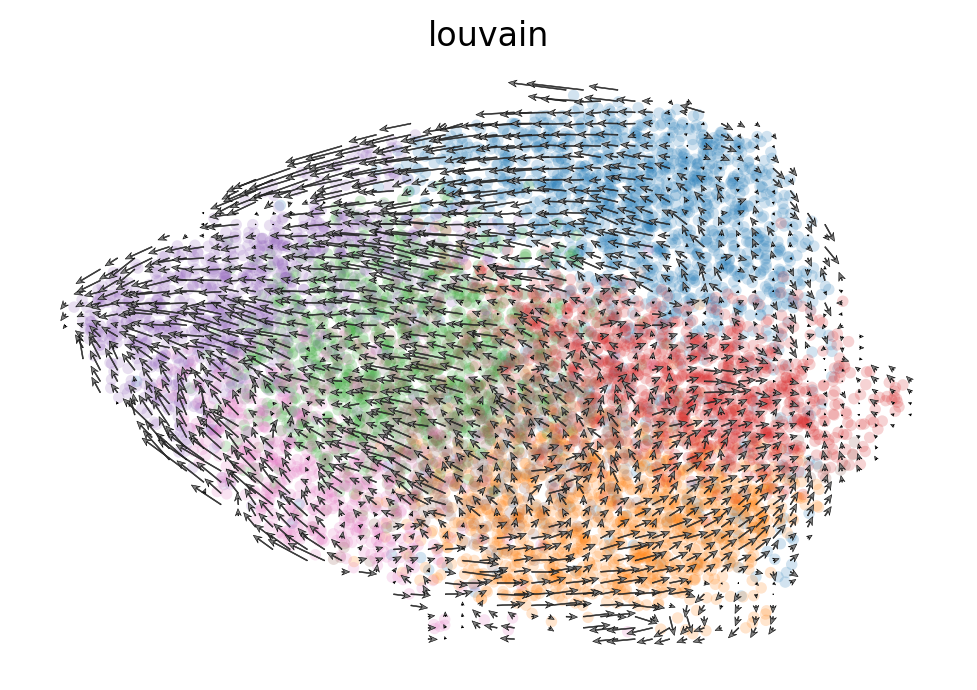

In [10]:
for batch, matrix in batches.items():
    print("now plotting for batch", batch)
    scv.pl.velocity_embedding_grid(matrix, basis='umap', arrow_length=4, arrow_size=1.5, dpi=200)

now plotting for batch S1
not found
now plotting for batch S2


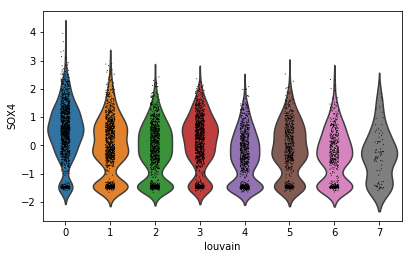

In [13]:
for batch, matrix in batches.items():
    print("now plotting for batch", batch)
    try:
        sc.pl.violin(matrix, ["SOX4"], groupby='louvain')
    except:
        print("not found")

In [15]:
for batch, matrix in batches.items():
    filename = "tgfb1-5-" + batch + ".h5ad"
    filename = os.path.join("write", filename)
    matrix.write(filename)